In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 


CSV_list

HSBA, JD, RIO, TSCO, SPX

GSK, AV, BA, RDSB

In [2]:
stocks = ['HSBA','JD','RIO','TSCO','SPX', 'GSK','AV','BA','RDSB']
start_date = '2016-01-01'
end_date = '2021-01-01'

In [3]:
def get_dates(lst):
    data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(lst[0]))
    data = data.loc[(data['time']>=start_date)&(data['time']<end_date)]
    date = [datetime.fromisoformat(i[:10]) for i in data['time']]
    return(date)

In [4]:
def get_lsts(lst):   
    new_list = []
    for i in lst:
        data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(i)) # read data from csv 注意文件夹路径和文件名
        df = data[['time','close']]                                          # get time and close price
        df.columns = ['date', i]                                       # change column names
        df.date = [datetime.fromisoformat(i[:10]) for i in df['date']]       # convert dates into datetime
        df = df.loc[(df['date']>=start_date)&(df['date']<end_date)]    # make sure date start from 2016-01-01
#     print(df.head(),df.tail(), len(df.date))                             # check header and df length
        df = df.reset_index(drop=True)
        new_list.append(df[i])
    return(new_list)

In [5]:
date = get_dates(stocks)
# date.head()

In [6]:
box = get_lsts(stocks)
# box.head()

/Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
df = pd.DataFrame(np.array(box).T, columns=stocks , index=np.array(date).T)
df.head()

,HSBA,JD,RIO,TSCO,SPX,GSK,AV,BA,RDSB
2016-01-04,520.40002,205.2,1902.5,142.25000,3190.0,1364.5,497.60001,493.5,1538.0
2016-01-05,522.59998,203.0,1939.5,144.39999,3225.0,1386.0,500.00000,494.0,1535.0
2016-01-06,508.29999,206.4,1846.5,141.55000,3191.0,1380.5,495.29999,512.5,1504.0
2016-01-07,502.00000,208.8,1784.5,139.20000,3175.0,1344.5,481.89999,505.5,1462.0
2016-01-08,499.10001,206.6,1739.0,146.89999,3129.0,1371.5,476.89999,519.5,1375.5


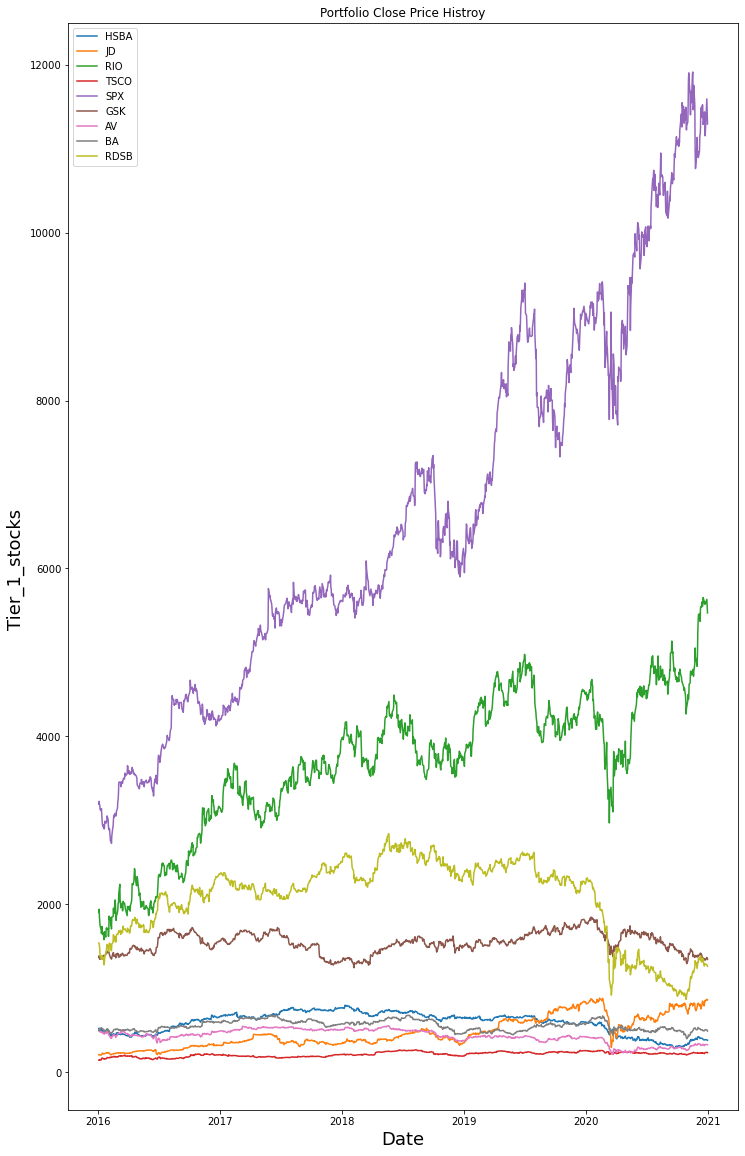

In [8]:
# visually show portfolio
title = 'Portfolio Close Price Histroy'

# get the stocks
my_stocks = df

# create
plt.figure(figsize=(12,20))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stocks ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [9]:
# show the daily simple return
returns = df.pct_change() #  pct_change = (day_price - previous_day_price) / previous_day_price
returns.head()

,HSBA,JD,RIO,TSCO,SPX,GSK,AV,BA,RDSB
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.004227,-0.010721,0.019448,0.015114,0.010972,0.015757,0.004823,0.001013,-0.001951
2016-01-06,-0.027363,0.016749,-0.047951,-0.019737,-0.010543,-0.003968,-0.009400,0.037449,-0.020195
2016-01-07,-0.012394,0.011628,-0.033577,-0.016602,-0.005014,-0.026078,-0.027054,-0.013659,-0.027926
2016-01-08,-0.005777,-0.010536,-0.025497,0.055316,-0.014488,0.020082,-0.010376,0.027695,-0.059166


In [10]:
# check the covariance among stocks
returns.cov()

,HSBA,JD,RIO,TSCO,SPX,GSK,AV,BA,RDSB
HSBA,0.000252,0.000104,0.000145,0.000066,0.000082,0.000069,0.000166,0.000099,0.000175
JD,0.000104,0.000672,0.000104,0.000085,0.000094,0.000050,0.000241,0.000147,0.000182
RIO,0.000145,0.000104,0.000445,0.000088,0.000119,0.000074,0.000170,0.000109,0.000239
TSCO,0.000066,0.000085,0.000088,0.000283,0.000058,0.000040,0.000107,0.000060,0.000071
SPX,0.000082,0.000094,0.000119,0.000058,0.000223,0.000065,0.000104,0.000092,0.000108
GSK,0.000069,0.000050,0.000074,0.000040,0.000065,0.000167,0.000062,0.000073,0.000107
AV,0.000166,0.000241,0.000170,0.000107,0.000104,0.000062,0.000357,0.000139,0.000213
BA,0.000099,0.000147,0.000109,0.000060,0.000092,0.000073,0.000139,0.000239,0.000137
RDSB,0.000175,0.000182,0.000239,0.000071,0.000108,0.000107,0.000213,0.000137,0.000441


In [11]:
# create the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,HSBA,JD,RIO,TSCO,SPX,GSK,AV,BA,RDSB
HSBA,0.063393,0.026258,0.036640,0.016598,0.020750,0.017302,0.041922,0.024829,0.044045
JD,0.026258,0.169282,0.026319,0.021411,0.023793,0.012516,0.060848,0.036991,0.045952
RIO,0.036640,0.026319,0.112028,0.022075,0.030028,0.018763,0.042948,0.027380,0.060297
TSCO,0.016598,0.021411,0.022075,0.071351,0.014583,0.010015,0.027039,0.015217,0.017810
SPX,0.020750,0.023793,0.030028,0.014583,0.056096,0.016345,0.026280,0.023200,0.027276
GSK,0.017302,0.012516,0.018763,0.010015,0.016345,0.042089,0.015738,0.018329,0.026892
AV,0.041922,0.060848,0.042948,0.027039,0.026280,0.015738,0.089965,0.035064,0.053564
BA,0.024829,0.036991,0.027380,0.015217,0.023200,0.018329,0.035064,0.060153,0.034410
RDSB,0.044045,0.045952,0.060297,0.017810,0.027276,0.026892,0.053564,0.034410,0.111052


In [12]:
weight = 1/len(stocks)
weights = np.full(shape=len(stocks), fill_value=weight, dtype=np.float)
# weights

In [13]:
# calculate the portfolio variance
port_variance = np.dot(weights.T , np.dot(cov_matrix_annual, weights))
port_variance

0.03474393224428711

In [14]:
# calculate the portfolio volatility aka std
port_volatility = np.sqrt(port_variance)
port_volatility

0.18639724312415973

In [15]:
# calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.11557104176774502

In [16]:
# show the expected annual return, volatility(risk), varicance
percent_var = str( round(port_variance, 2) * 100)+ '%'
percent_vols = str( round(port_volatility, 2) *100)+ '%'
percent_ret = str( round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print('expected annual return:'+ percent_ret)
print('annual volatility/risk:'+ percent_vols)
print('annual variance:'+ percent_var)

expected annual return:12.0%
annual volatility/risk:19.0%
annual variance:3.0%


In [17]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models 
from pypfopt import expected_returns

In [18]:
# portfolio optimization!

# calculate expected returns and the annualised sample cov matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [19]:
# optimaize for max sharp ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
print(ef.portfolio_performance(verbose=True))

OrderedDict([('HSBA', 0.0), ('JD', 0.20876), ('RIO', 0.10117), ('TSCO', 0.0), ('SPX', 0.69007), ('GSK', 0.0), ('AV', 0.0), ('BA', 0.0), ('RDSB', 0.0)])
Expected annual return: 29.1%
Annual volatility: 21.8%
Sharpe Ratio: 1.24
(0.2905719898465595, 0.2177067768083364, 1.242827595048933)


In [20]:
# get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'JD': 240, 'RIO': 19, 'SPX': 61}
Funds remaining: $675.00
